# Factorial experiment for HPL on Dahu

In [1]:
import io
import zipfile
import pandas
import matplotlib
%matplotlib inline
archive = zipfile.ZipFile('grenoble_2018-08-10_1808139.zip')
df = dataframe = pandas.read_csv(io.BytesIO(archive.read('results.csv')))
print(len(df))
df['index'] = range(len(df))
df.head()

80


,proc_q,mem_align,time,bcast,block_size,depth,pfact,proc_p,swap,rfact,gflops,matrix_size,index
0,4,8,40.96,0,128,1,2,4,1,2,4581.0,65536,0
1,4,8,41.99,0,128,1,2,4,2,2,4469.0,65536,1
2,4,8,42.55,2,128,1,2,4,2,2,4410.0,65536,2
3,4,8,41.31,0,128,1,2,4,2,2,4543.0,65536,3
4,4,8,41.48,1,128,1,2,4,2,2,4524.0,65536,4


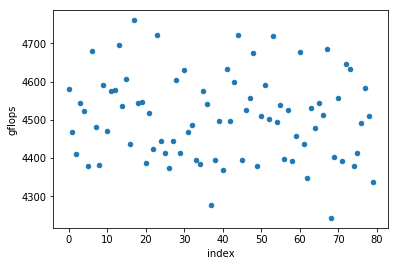

In [2]:
df.plot.scatter(x='index', y='gflops')

In [3]:
factors = list(df.columns)
for fact in ['matrix_size', 'gflops', 'time', 'proc_p', 'proc_q', 'index']:
    factors.remove(fact)

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def my_anova(df, factors, response):
    f_str = ['C(%s)' % fact for fact in factors if len(df[fact].unique()) > 1]
    formula = ' + '.join(f_str)
    formula = '(%s)**2' % formula
    formula = '%s ~ %s' % (response, formula)
    print(formula)
    model = ols(formula, df).fit()
    aov_table = anova_lm(model, typ=2)
    aov_table['stars'] = ''
    aov_table.loc[aov_table['PR(>F)'] < 0.1 ,  'stars'] = '.'
    aov_table.loc[aov_table['PR(>F)'] < 0.05,  'stars'] = '*'
    aov_table.loc[aov_table['PR(>F)'] < 0.01,  'stars'] = '**'
    aov_table.loc[aov_table['PR(>F)'] < 0.001, 'stars'] = '***'
    return aov_table

In [5]:
my_anova(df, factors, 'gflops')

gflops ~ (C(bcast) + C(swap))**2


,sum_sq,df,F,PR(>F),stars
C(bcast),2438.95,3.0,0.065688,0.977887,
C(swap),39516.05,1.0,3.192838,0.078171,.
C(bcast):C(swap),31159.35,3.0,0.839210,0.476802,
Residual,891105.60,72.0,NaN,NaN,


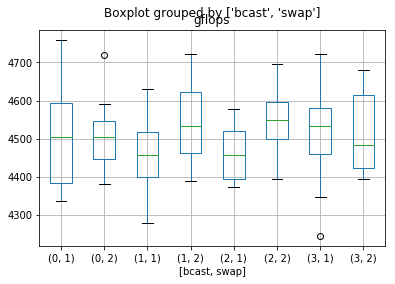

In [6]:
df.boxplot(by=['bcast', 'swap'], column='gflops')